# 金融和经济数据应用
* 利用Python进行数据分析 第十一章

In [1]:
from datetime import datetime
from datetime import timedelta
from datetime import time

from dateutil.parser import parse
from IPython.display import Image

import random; random.seed(0)
import string

import pandas_datareader.data as web

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 一、数据规整化方面的话题

### 1 时间序列以及截面对齐
* 数据对齐问题（data alignment）
* pandas 可以在算术运算中自动对齐数据

In [43]:
close_px_all = pd.read_csv('py35_data/stock_px_chp11.csv', parse_dates=True, index_col=0)
rng = pd.date_range('9/6/2011', periods = 9, freq = 'D')
prices = pd.DataFrame(close_px_all[['AAPL', 'JNJ','SPX', 'XOM']], index = rng)
prices = prices.dropna()
prices

,AAPL,JNJ,SPX,XOM
2011-09-06,379.74,64.64,1165.24,71.15
2011-09-07,383.93,65.43,1198.62,73.65
2011-09-08,384.14,64.95,1185.90,72.82
2011-09-09,377.48,63.64,1154.23,71.01
2011-09-12,379.94,63.59,1162.27,71.84
2011-09-13,384.62,63.61,1172.87,71.65
2011-09-14,389.30,63.73,1188.68,72.64


In [46]:
close_px_all = pd.read_csv('py35_data/volume_chp11.csv', parse_dates=True, index_col=0)
rng = pd.date_range('9/6/2011', periods = 7, freq = 'D')
volume = pd.DataFrame(close_px_all[['AAPL', 'JNJ','SPX', 'XOM']], index = rng)
volume = volume.dropna()
volume

,AAPL,JNJ,SPX,XOM
2011-09-06,18173500.0,15848300.0,5.103980e+09,25416300.0
2011-09-07,12492000.0,10759700.0,4.441040e+09,23108400.0
2011-09-08,14839800.0,15551500.0,4.465170e+09,22434800.0
2011-09-09,20171900.0,17008200.0,4.586370e+09,27969100.0
2011-09-12,16697300.0,13448200.0,5.168550e+09,26205800.0


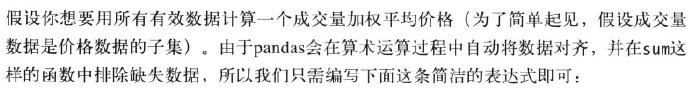

In [7]:
Image(filename="py35_picture\Time Series and Cross-Section Alignment.png")

In [47]:
prices * volume

,AAPL,JNJ,SPX,XOM
2011-09-06,3.302761e+14,2.511686e+14,2.605061e+19,6.459883e+14
2011-09-07,1.560501e+14,1.157711e+14,1.972284e+19,5.339982e+14
2011-09-08,2.202197e+14,2.418492e+14,1.993774e+19,5.033203e+14
2011-09-09,4.069055e+14,2.892789e+14,2.103479e+19,7.822706e+14
2011-09-12,2.787998e+14,1.808541e+14,2.671391e+19,6.867440e+14
2011-09-13,NaN,NaN,NaN,NaN
2011-09-14,NaN,NaN,NaN,NaN


In [55]:
vmap = (prices * volume).sum() / volume.sum()
vmap

AAPL    1.690148e+07
JNJ     1.485793e+07
SPX     4.774221e+09
XOM     2.519148e+07
dtype: float64

In [56]:
# 手动对齐
prices.align(volume, join = 'inner')

(                  AAPL         JNJ           SPX         XOM
 2011-09-06  18173500.0  15848300.0  5.103980e+09  25416300.0
 2011-09-07  12492000.0  10759700.0  4.441040e+09  23108400.0
 2011-09-08  14839800.0  15551500.0  4.465170e+09  22434800.0
 2011-09-09  20171900.0  17008200.0  4.586370e+09  27969100.0
 2011-09-12  16697300.0  13448200.0  5.168550e+09  26205800.0,
                   AAPL         JNJ           SPX         XOM
 2011-09-06  18173500.0  15848300.0  5.103980e+09  25416300.0
 2011-09-07  12492000.0  10759700.0  4.441040e+09  23108400.0
 2011-09-08  14839800.0  15551500.0  4.465170e+09  22434800.0
 2011-09-09  20171900.0  17008200.0  4.586370e+09  27969100.0
 2011-09-12  16697300.0  13448200.0  5.168550e+09  26205800.0)

In [58]:
s1 = pd.Series(range(3), index=['a', 'b', 'c'])
s2 = pd.Series(range(4), index=['d', 'b', 'c', 'e'])
s3 = pd.Series(range(3), index=['f', 'a', 'c'])
pd.DataFrame({'one': s1, 'two': s2, 'three': s3})

,one,three,two
a,0.0,1.0,NaN
b,1.0,NaN,1.0
c,2.0,2.0,2.0
d,NaN,NaN,0.0
e,NaN,NaN,3.0
f,NaN,0.0,NaN


In [60]:
pd.DataFrame({'one': s1, 'two': s2, 'three': s3}, index=list('face'))

,one,three,two
f,NaN,0.0,NaN
a,0.0,1.0,NaN
c,2.0,2.0,2.0
e,NaN,NaN,3.0


### 2 频率不同的时间序列的运算

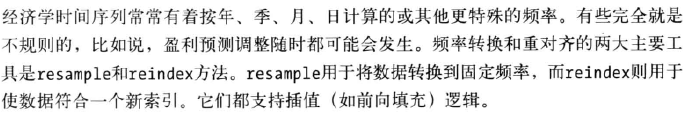

In [61]:
Image(filename="py35_picture\Operations with Time Series of Different Frequencies.png")

In [65]:
ts1 = pd.Series(np.random.randn(3), index=pd.date_range('2012-6-13', periods=3, freq='W-WED'))
ts1.resample('B').mean()  # 重采样到工作日（星期一到星期五）频率

2012-06-13    0.669223
2012-06-14         NaN
2012-06-15         NaN
2012-06-18         NaN
2012-06-19         NaN
2012-06-20   -0.502830
2012-06-21         NaN
2012-06-22         NaN
2012-06-25         NaN
2012-06-26         NaN
2012-06-27   -0.984298
Freq: B, dtype: float64

In [66]:
ts1.resample('B').mean().ffill()

2012-06-13    0.669223
2012-06-14    0.669223
2012-06-15    0.669223
2012-06-18    0.669223
2012-06-19    0.669223
2012-06-20   -0.502830
2012-06-21   -0.502830
2012-06-22   -0.502830
2012-06-25   -0.502830
2012-06-26   -0.502830
2012-06-27   -0.984298
Freq: B, dtype: float64

In [70]:
dates = pd.DatetimeIndex(['2012-6-12', '2012-6-17', '2012-6-18','2012-6-21', '2012-6-22', '2012-6-29'])
ts2 = pd.Series(np.random.randn(6), index=dates)
ts2 # 不规整样本（各时间点更一般化）

2012-06-12    0.931911
2012-06-17    0.342277
2012-06-18    0.172178
2012-06-21   -2.023318
2012-06-22   -0.154718
2012-06-29    1.018231
dtype: float64

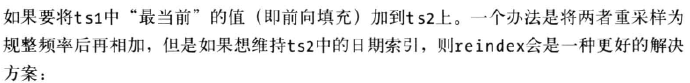

In [71]:
Image(filename="py35_picture\Operations with Time Series of Different Frequencies 2.png")

In [88]:
ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17    0.669223
2012-06-18    0.669223
2012-06-21   -0.502830
2012-06-22   -0.502830
2012-06-29   -0.984298
dtype: float64

In [87]:
ts2 + ts1.reindex(ts2.index, method='ffill')

2012-06-12         NaN
2012-06-17    1.011500
2012-06-18    0.841401
2012-06-21   -2.526148
2012-06-22   -0.657547
2012-06-29    0.033934
dtype: float64

In [78]:
# 使用 period
gdp = pd.Series([1.78, 1.94, 2.08, 2.01, 2.15, 2.31, 2.46], index=pd.period_range('1984Q2', periods=7, freq='Q-SEP'))
infl = pd.Series([0.025, 0.045, 0.037, 0.04],index=pd.period_range('1982', periods=4, freq='A-DEC'))
print(gdp)
infl

1984Q2    1.78
1984Q3    1.94
1984Q4    2.08
1985Q1    2.01
1985Q2    2.15
1985Q3    2.31
1985Q4    2.46
Freq: Q-SEP, dtype: float64


1982    0.025
1983    0.045
1984    0.037
1985    0.040
Freq: A-DEC, dtype: float64

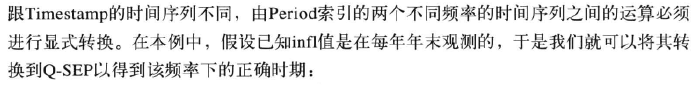

In [83]:
Image(filename="py35_picture\Operations with Time Series of Different Frequencies 3.png")

In [84]:
infl_q = infl.asfreq('Q-SEP', how='end')
infl_q

1983Q1    0.025
1984Q1    0.045
1985Q1    0.037
1986Q1    0.040
Freq: Q-SEP, dtype: float64

In [86]:
infl_q.reindex(gdp.index, method='ffill') # 时间序列可以被重索引（使用前向填充以匹配gdp）

1984Q2    0.045
1984Q3    0.045
1984Q4    0.045
1985Q1    0.037
1985Q2    0.037
1985Q3    0.037
1985Q4    0.037
Freq: Q-SEP, dtype: float64

### 3 时间和“最当前”数据选取

In [97]:
# 生成一个交易日内的日期范围和时间序列
rng = pd.date_range('2012-06-01 09:30', '2012-06-01 15:59', freq='T')

# 生成5天的时间点（9:30 - 15:59 之间的值）
rng = rng.append([rng + pd.offsets.BDay(i) for i in range(1, 4)])
ts = pd.Series(np.arange(len(rng), dtype=float), index=rng)
ts

2012-06-01 09:30:00       0.0
2012-06-01 09:31:00       1.0
2012-06-01 09:32:00       2.0
2012-06-01 09:33:00       3.0
2012-06-01 09:34:00       4.0
2012-06-01 09:35:00       5.0
2012-06-01 09:36:00       6.0
2012-06-01 09:37:00       7.0
2012-06-01 09:38:00       8.0
2012-06-01 09:39:00       9.0
2012-06-01 09:40:00      10.0
2012-06-01 09:41:00      11.0
2012-06-01 09:42:00      12.0
2012-06-01 09:43:00      13.0
2012-06-01 09:44:00      14.0
2012-06-01 09:45:00      15.0
2012-06-01 09:46:00      16.0
2012-06-01 09:47:00      17.0
2012-06-01 09:48:00      18.0
2012-06-01 09:49:00      19.0
2012-06-01 09:50:00      20.0
2012-06-01 09:51:00      21.0
2012-06-01 09:52:00      22.0
2012-06-01 09:53:00      23.0
2012-06-01 09:54:00      24.0
2012-06-01 09:55:00      25.0
2012-06-01 09:56:00      26.0
2012-06-01 09:57:00      27.0
2012-06-01 09:58:00      28.0
2012-06-01 09:59:00      29.0
                        ...  
2012-06-06 15:30:00    1530.0
2012-06-06 15:31:00    1531.0
2012-06-06

In [99]:
print(ts[time(10, 0)]) # datetime.time对象进行索引即可抽取出这些时间点上的值
print()
print(ts.at_time(time(10, 0)))
ts.between_time(time(10, 0), time(10, 1))

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     420.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1200.0
dtype: float64


2012-06-01 10:00:00      30.0
2012-06-01 10:01:00      31.0
2012-06-04 10:00:00     420.0
2012-06-04 10:01:00     421.0
2012-06-05 10:00:00     810.0
2012-06-05 10:01:00     811.0
2012-06-06 10:00:00    1200.0
2012-06-06 10:01:00    1201.0
dtype: float64

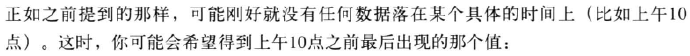

In [102]:
Image(filename="py35_picture\At moment.png")

In [104]:
# 将该时间序列的大部分内容随机设置为NA
indexer = np.sort(np.random.permutation(len(ts))[700:])
irr_ts = ts.copy()
irr_ts[indexer] = np.nan
irr_ts['2012-06-01 09:50':'2012-06-01 10:00']

2012-06-01 09:50:00     NaN
2012-06-01 09:51:00     NaN
2012-06-01 09:52:00     NaN
2012-06-01 09:53:00     NaN
2012-06-01 09:54:00     NaN
2012-06-01 09:55:00     NaN
2012-06-01 09:56:00    26.0
2012-06-01 09:57:00     NaN
2012-06-01 09:58:00    28.0
2012-06-01 09:59:00     NaN
2012-06-01 10:00:00    30.0
dtype: float64

In [105]:
# 如果将一组Timestamp传入asof方法，就能得到这些时间点处（或其之前最近）的有效值（非NA）
selection = pd.date_range('2012-06-01 10:00', periods=4, freq='B')
irr_ts.asof(selection)

2012-06-01 10:00:00      30.0
2012-06-04 10:00:00     419.0
2012-06-05 10:00:00     810.0
2012-06-06 10:00:00    1198.0
Freq: B, dtype: float64

### 4 拼接多个数据源

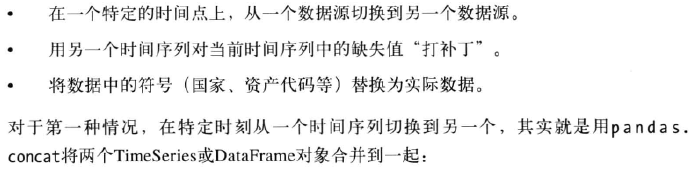

In [106]:
Image(filename="py35_picture\Splicing Together Data Sources.png")

In [119]:
data1 = pd.DataFrame(np.ones((6, 3), 
                   dtype=float),columns=['a', 'b', 'c'], 
                   index=pd.date_range('6/12/2012', periods=6))
data2 = pd.DataFrame(np.ones((6, 3), dtype=float) * 2,
                   columns=['a', 'b', 'c'],
                   index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.ix[:'2012-06-14'], data2.ix['2012-06-15':]])
spliced

,a,b,c
2012-06-12,1.0,1.0,1.0
2012-06-13,1.0,1.0,1.0
2012-06-14,1.0,1.0,1.0
2012-06-15,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0


In [122]:
# data1 缺失了 data2 中存在的某个时间序列
data2 = pd.DataFrame(np.ones((6, 4), dtype=float) * 2,
                  columns=['a', 'b', 'c', 'd'],
                  index=pd.date_range('6/13/2012', periods=6))
spliced = pd.concat([data1.ix[:'2012-06-14'], data2.ix['2012-06-15':]])
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,NaN
2012-06-14,1.0,1.0,1.0,NaN
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [123]:
spliced_filled = spliced.combine_first(data2) # 引入合并点之前的数据
spliced_filled

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [124]:
spliced.update(data2, overwrite=False) #只想填充空洞
spliced

,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,2.0,2.0,2.0,2.0
2012-06-16,2.0,2.0,2.0,2.0
2012-06-17,2.0,2.0,2.0,2.0
2012-06-18,2.0,2.0,2.0,2.0


In [125]:
cp_spliced = spliced.copy()
print(cp_spliced)
cp_spliced[['a', 'c']] = data1[['a', 'c']] # 直接对列进行设置
cp_spliced

              a    b    c    d
2012-06-12  1.0  1.0  1.0  NaN
2012-06-13  1.0  1.0  1.0  2.0
2012-06-14  1.0  1.0  1.0  2.0
2012-06-15  2.0  2.0  2.0  2.0
2012-06-16  2.0  2.0  2.0  2.0
2012-06-17  2.0  2.0  2.0  2.0
2012-06-18  2.0  2.0  2.0  2.0


,a,b,c,d
2012-06-12,1.0,1.0,1.0,NaN
2012-06-13,1.0,1.0,1.0,2.0
2012-06-14,1.0,1.0,1.0,2.0
2012-06-15,1.0,2.0,1.0,2.0
2012-06-16,1.0,2.0,1.0,2.0
2012-06-17,1.0,2.0,1.0,2.0
2012-06-18,NaN,2.0,NaN,2.0


### 5 收益指数和累计收益

In [142]:
prices = web.DataReader('AAPL','yahoo', '2011-01-01','2012-07-27') # 2011-2012 苹果公司的股票价格数据
price = web.DataReader('AAPL','yahoo', '2011-01-01','2012-07-27')['Adj Close']
print(price[-5:])
prices[-5:]

Date
2012-07-23    78.571124
2012-07-24    78.192467
2012-07-25    74.815825
2012-07-26    74.804116
2012-07-27    76.141758
Name: Adj Close, dtype: float64


,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-07-23,594.399986,605.900009,587.710007,603.830002,121993900,78.571124
2012-07-24,607.379990,609.680016,598.509987,600.919975,141283100,78.192467
2012-07-25,574.459984,580.799995,570.000015,574.970009,219328200,74.815825
2012-07-26,579.760025,580.399986,570.360023,574.880020,101658200,74.804116
2012-07-27,575.010010,585.830017,571.590012,585.159988,100984100,76.141758


In [138]:
price['2011-10-03'] / price['2011-3-01'] - 1 # 计算两个时间点之间的累计百分比回报只需计算价格的百分比即可

0.072399878739767276

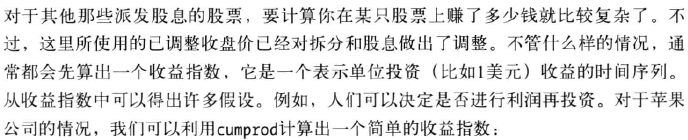

In [149]:
Image(filename="py35_picture\Return Indexes and Cumulative Returns.png")

In [184]:
returns = price.pct_change()
ret_index = (1 + returns).cumprod()
ret_index[0] = 1 # Set first value to 1
ret_index[:10]

Date
2011-01-03    1.000000
2011-01-04    1.005219
2011-01-05    1.013442
2011-01-06    1.012622
2011-01-07    1.019874
2011-01-10    1.039081
2011-01-11    1.036623
2011-01-12    1.045059
2011-01-13    1.048882
2011-01-14    1.057378
Name: Adj Close, dtype: float64

In [145]:
m_returns = ret_index.resample('BM').last().pct_change() # 计算指定时期内的累计收益
m_returns['2012']

Date
2012-01-31    0.127111
2012-02-29    0.188311
2012-03-30    0.105284
2012-04-30   -0.025970
2012-05-31   -0.010702
2012-06-29    0.010853
2012-07-31    0.001986
Freq: BM, Name: Adj Close, dtype: float64

In [148]:
m_rets = (1 + returns).resample('M', kind='period').prod() - 1 # 通过重采样聚合从日百分比变化中计算得出
m_rets['2012']

Date
2012-01    0.127111
2012-02    0.188311
2012-03    0.105284
2012-04   -0.025970
2012-05   -0.010702
2012-06    0.010853
2012-07    0.001986
Freq: M, Name: Adj Close, dtype: float64

## 二、分组变换和分析

In [154]:
# 随机生成1000个股票代码
N = 1000
def rands(n):
    choices = string.ascii_uppercase
    return ''.join([random.choice(choices) for _ in range(n)])
tickers = np.array([rands(5) for _ in range(N)])
tickers[:5]

array(['ILVWD', 'DMKYK', 'JKYAG', 'VUJUF', 'FRFPH'], 
      dtype='<U5')

In [177]:
# 创建一个含有3列的DataFrame来承载数据，但只选择部分股票
M = 10
df = pd.DataFrame({'Momentum' : np.random.randn(M) / 200 + 0.03,
    'Value' : np.random.randn(M) / 200 + 0.08,
    'ShortInterest' : np.random.randn(M) / 200 - 0.02},
    index = tickers[:M])
df[:5]

,Momentum,ShortInterest,Value
ILVWD,0.021652,-0.021323,0.083621
DMKYK,0.036808,-0.019964,0.086391
JKYAG,0.028789,-0.017762,0.076428
VUJUF,0.031654,-0.023738,0.084587
FRFPH,0.020710,-0.021246,0.081654


In [178]:
# 创建行业分类
ind_names = np.array(['FINANCIAL', 'TECH'])
sampler = np.random.randint(0, len(ind_names), N)
industries = pd.Series(ind_names[sampler], index=tickers,name='industry')
industries[:5]

ILVWD         TECH
DMKYK    FINANCIAL
JKYAG         TECH
VUJUF         TECH
FRFPH    FINANCIAL
Name: industry, dtype: object

In [179]:
# 根据行业分类进行分组并执行分组聚合和变换
by_industry = df.groupby(industries)
print(by_industry.mean())
by_industry.describe()

           Momentum  ShortInterest     Value
industry                                    
FINANCIAL  0.033914      -0.020763  0.078850
TECH       0.027933      -0.019753  0.080233


Momentum  ShortInterest     Value
industry                                          
FINANCIAL count  6.000000       6.000000  6.000000
          mean   0.033914      -0.020763  0.078850
          std    0.006955       0.003560  0.006381
          min    0.020710      -0.025230  0.069270
          25%    0.032941      -0.022547  0.075494
          50%    0.037160      -0.020886  0.079072
          75%    0.037722      -0.020105  0.083513
          max    0.039013      -0.014632  0.086391
TECH      count  4.000000       4.000000  4.000000
          mean   0.027933      -0.019753  0.080233
          std    0.004356       0.003416  0.004488
          min    0.021652      -0.023738  0.076295
          25%    0.027004      -0.021927  0.076395
          50%    0.029212      -0.019542  0.080025
          75%    0.030141      -0.017369  0.083863
          max    0.031654      -0.016189  0.084587

In [180]:
# 自定义函数：行业内标准化处理
def zscore(group):
    return (group - group.mean()) / group.std()
df_stand = by_industry.apply(zscore)

In [181]:
df_stand.groupby(industries).agg(['mean', 'std']) # 均值为0，标准差为1

Momentum      ShortInterest              Value     
                   mean  std          mean  std          mean  std
industry                                                          
FINANCIAL  1.387779e-16  1.0 -9.621933e-16  1.0  2.535009e-15  1.0
TECH       4.024558e-16  1.0  0.000000e+00  1.0 -7.494005e-16  1.0

In [182]:
# 行业内降序排名
ind_rank = by_industry.rank(ascending=False)
ind_rank.groupby(industries).agg(['min', 'max'])

Momentum      ShortInterest      Value     
               min  max           min  max   min  max
industry                                             
FINANCIAL      1.0  6.0           1.0  6.0   1.0  6.0
TECH           1.0  4.0           1.0  4.0   1.0  4.0

In [183]:
# 行业内排名和标准化
by_industry.apply(lambda x: zscore(x.rank()))

,Momentum,ShortInterest,Value
ILVWD,-1.161895,-0.387298,0.387298
DMKYK,-0.267261,0.801784,1.336306
JKYAG,-0.387298,0.387298,-0.387298
VUJUF,1.161895,-1.161895,1.161895
FRFPH,-1.336306,-0.267261,0.267261
CWQIW,0.801784,-0.801784,0.801784
DBMXC,0.267261,0.267261,-1.336306
MOPVE,1.336306,-1.336306,-0.801784
WEBDE,0.387298,1.161895,-1.161895
UDMTD,-0.801784,1.336306,-0.267261


### 1 分组因子暴露

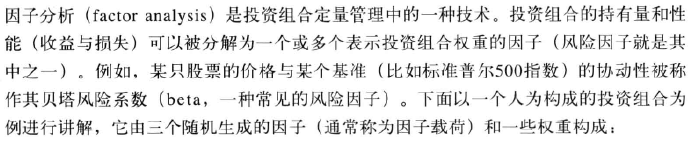

In [185]:
Image(filename="py35_picture\Group Factor Exposures.png")

In [188]:
from numpy.random import rand
fac1, fac2, fac3 = np.random.rand(3, 1000)
ticker_subset = tickers.take(np.random.permutation(N)[:1000])
# 因子加权和以及噪声
port = pd.Series(0.7 * fac1 - 1.2 * fac2 + 0.3 * fac3 + rand(1000),index=ticker_subset)
factors = pd.DataFrame({'f1': fac1, 'f2': fac2, 'f3': fac3},index=ticker_subset)

In [189]:
factors.corrwith(port) # 各因子与投资组合之间的矢量相关性

f1    0.404265
f2   -0.690561
f3    0.178413
dtype: float64

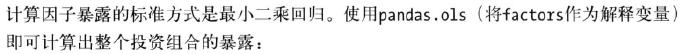

In [193]:
Image(filename="py35_picture\Group Factor Exposures 2.png")

In [198]:
pd.ols(y=port, x=factors).beta

D:\software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)


f1           0.701512
f2          -1.179439
f3           0.262030
intercept    0.507541
dtype: float64

In [191]:
# 还可通过groupby计算各行业的暴露量
def beta_exposure(chunk, factors=None):
    return pd.ols(y=chunk, x=factors).beta

In [192]:
# 根据行业进行分组，并应用该函数，传入因子载荷的DataFrame
by_ind = port.groupby(industries)
exposures = by_ind.apply(beta_exposure, factors=factors)
exposures.unstack()

D:\software\Anaconda3\lib\site-packages\pandas\core\groupby.py:647: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  return func(g, *args, **kwargs)


,f1,f2,f3,intercept
industry,,,,
FINANCIAL,0.685914,-1.147817,0.256125,0.501007
TECH,0.717392,-1.207900,0.267830,0.514276


### 2 十分位和四分位分析

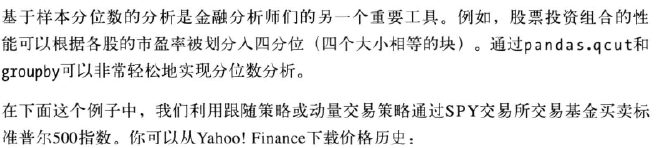

In [35]:
Image(filename="py35_picture\Decile and Quartile Analysis.png")

In [5]:
data = web.DataReader('SPY','yahoo','2006-01-01')
data[:5]

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,125.190002,127.000000,124.389999,126.699997,73256700,101.622813
2006-01-04,126.860001,127.489998,126.699997,127.300003,51899600,102.104063
2006-01-05,127.150002,127.589996,126.879997,127.379997,47307500,102.168224
2006-01-06,128.020004,128.580002,127.360001,128.440002,62885900,103.018427
2006-01-09,128.419998,129.059998,128.380005,128.770004,43527400,103.283113


In [31]:
# 计算日收益率，并将收益率变换为趋势信号（通过滞后移动形成）
px = data['Adj Close']
returns = px.pct_change()

def to_index(rets):
    index = (1 + rets).cumprod()
    first_loc = max(index.index.get_loc(index.idxmax()) - 1, 0)
    index.values[first_loc] = 1
    return index

def trend_signal(rets, lookback, lag):
    signal = pd.Series.rolling(rets, lookback, min_periods = lookback -5).sum()
    return signal.shift(lag)

In [32]:
# 创建和测试一种根据每周五动量信号进行交易的交易策略
signal = trend_signal(returns, 100, 30)
trade_friday = signal.resample('W-FRI').mean().resample('B').ffill()
trade_rets = trade_friday.shift(1) * returns

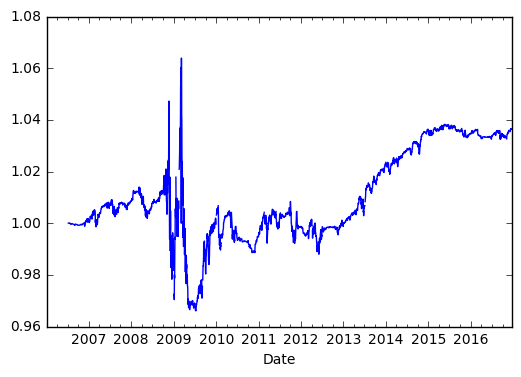

In [34]:
# 将该策略的收益率转换为一个收益指数，并绘制图表
to_index(trade_rets).plot()

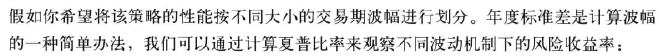

In [36]:
Image(filename="py35_picture\Decile and Quartile Analysis 2.png")

In [47]:
vol = pd.Series.rolling(returns, 250, min_periods = 200).std() * np.sqrt(250)
def sharpe(rets, ann = 250):
    return rets.mean() / rets.std() * np.sqrt(ann)

In [45]:
# 用qcut 将vol 划分为四等份，并用sharpe进行聚合
#trade_rets.groupby(pd.qcut(vol,4)).agg(sharpe)
cats = pd.qcut(vol, 4)
print('cats: %d, trade_rets: %d, vol: %d' % (len(cats), len(trade_rets), len(vol)))

cats: 2758, trade_rets: 2859, vol: 2758


In [50]:
trade_rets[:2758].groupby(cats).agg(sharpe)

Adj Close
[0.0954, 0.117]    1.044870
(0.117, 0.161]     0.985887
(0.161, 0.197]     0.150784
(0.197, 0.457]    -0.056099
Name: Adj Close, dtype: float64

## 三、示例应用

### 1 信号前沿分析

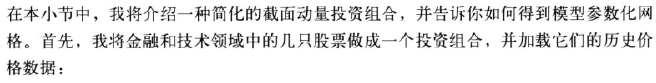

In [59]:
Image(filename="py35_picture\Signal Frontier Analysis.png")

In [52]:
names = ['AAPL', 'GOOG', 'MSFT', 'DELL', 'GS', 'MS', 'BAC', 'C']
def get_px(stock, start, end):
    return web.get_data_yahoo(stock, start, end)['Adj Close']
px = pd.DataFrame({n: get_px(n, None, None) for n in names})

In [53]:
plt.close('all')

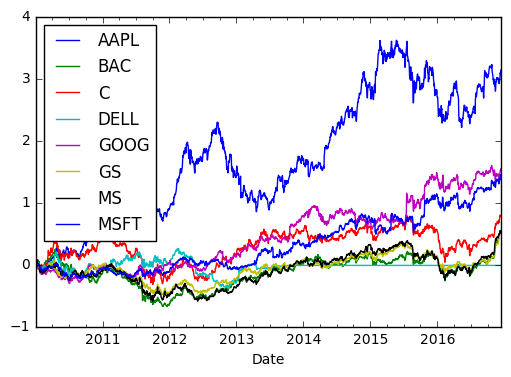

In [54]:
# 绘制每只股票的累计收益
px = px.asfreq('B').fillna(method='pad')
rets = px.pct_change()
((1 + rets).cumprod() - 1).plot()

In [55]:
# 计算特定回顾期的动量，然后按降序排列并标准化
def calc_mom(price, lookback, lag):
    mom_ret = price.shift(lag).pct_change(lookback)
    ranks = mom_ret.rank(axis=1, ascending=False)
    demeaned = ranks.subtract(ranks.mean(axis=1), axis=0)
    return demeaned.divide(demeaned.std(axis=1), axis=0)

In [56]:
# 对策略进行事后检验的函数：通过指定回顾期和持有期（买卖之间的日期）计算投资组合整体的夏普比率
compound = lambda x : (1 + x).prod() - 1
daily_sr = lambda x: x.mean() / x.std()

def strat_sr(prices, lb, hold):
    # 计算投资组合权重
    freq = '%dB' % hold
    port = calc_mom(prices, lb, lag=1)

    daily_rets = prices.pct_change()

    # 计算投资组合收益
    port = port.shift(1).resample(freq, how='first')
    returns = daily_rets.resample(freq, how=compound)
    port_rets = (port * returns).sum(axis=1)

    return daily_sr(port_rets) * np.sqrt(252 / hold)

In [57]:
# 通过价格数据以及一对参数组合调用该函数将会得到一个标量值
strat_sr(px, 70, 30)

D:\software\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
D:\software\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


-0.21832310989332854

In [61]:
# 对参数网格（即多对参数组合）应用start_sr函数
from collections import defaultdict

lookbacks = range(20, 90, 5)
holdings = range(20, 90, 5)
dd = defaultdict(dict)
for lb in lookbacks:
    for hold in holdings:
        dd[lb][hold] = strat_sr(px, lb, hold)

ddf = pd.DataFrame(dd)
ddf.index.name = 'Holding Period'
ddf.columns.name = 'Lookback Period'

D:\software\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
D:\software\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


In [62]:
# 结果图形化
import matplotlib.pyplot as plt

def heatmap(df, cmap=plt.cm.gray_r):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    axim = ax.imshow(df.values, cmap=cmap, interpolation='nearest')
    ax.set_xlabel(df.columns.name)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_xticklabels(list(df.columns))
    ax.set_ylabel(df.index.name)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(list(df.index))
    plt.colorbar(axim)

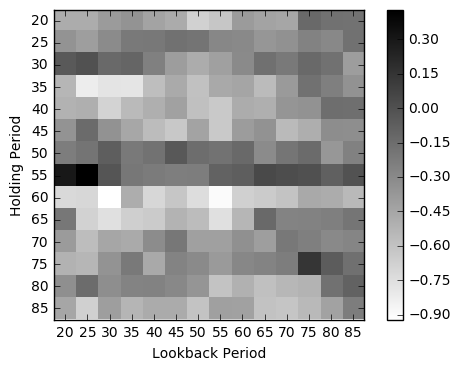

In [63]:
heatmap(ddf) # 传入事后检验结果

### 2 期货合约转仓

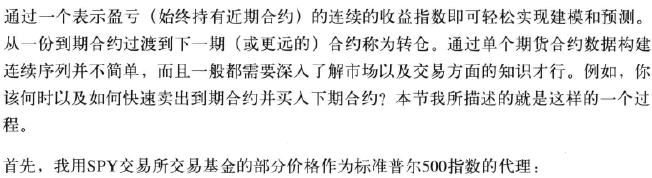

In [87]:
Image(filename="py35_picture\Future Contract Rolling.png")

In [70]:
pd.options.display.max_rows = 10

In [71]:
import pandas.io.data as web
# Approximate price of S&P 500 index
px = web.get_data_yahoo('SPY')['Adj Close'] * 10
px

D:\software\Anaconda3\lib\site-packages\pandas\io\data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


Date
2010-01-04     987.93254
2010-01-05     990.54769
2010-01-06     991.24509
2010-01-07     995.42943
2010-01-08     998.74198
                 ...    
2016-12-08    2251.49994
2016-12-09    2265.09995
2016-12-12    2262.50000
2016-12-13    2277.59995
2016-12-14    2258.80005
Name: Adj Close, dtype: float64

In [73]:
# 放入两份标准普尔500指数期货合约及其到期日期
from datetime import datetime
expiry = {'ESU2': datetime(2012, 9, 21),
          'ESZ2': datetime(2012, 12, 21)}
expiry = pd.Series(expiry).order()

D:\software\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


In [74]:
expiry

ESU2   2012-09-21
ESZ2   2012-12-21
dtype: datetime64[ns]

In [76]:
# 用Yahoo！Finance的价格以及一个随机漫步和一些噪声来模拟这两份合约的未来的走势
np.random.seed(12347)
N = 200
walk = (np.random.randint(0, 200, size=N) - 100) * 0.25
perturb = (np.random.randint(0, 20, size=N) - 10) * 0.25
walk = walk.cumsum()

rng = pd.date_range(px.index[0], periods=len(px) + N, freq='B')
near = np.concatenate([px.values, px.values[-1] + walk])
far = np.concatenate([px.values, px.values[-1] + walk + perturb])
prices = pd.DataFrame({'ESU2': near, 'ESZ2': far}, index=rng)

In [77]:
prices.tail() # price中有关于这两个合约的时间序列

,ESU2,ESZ2
2017-06-20,2288.05005,2289.80005
2017-06-21,2274.30005,2276.55005
2017-06-22,2282.30005,2284.05005
2017-06-23,2298.80005,2298.05005
2017-06-26,2278.80005,2276.55005


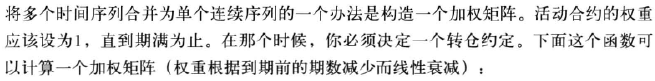

In [88]:
Image(filename="py35_picture\Future Contract Rolling 2.png")

In [80]:
def get_roll_weights(start, expiry, items, roll_periods=5):
    # start : first date to compute weighting DataFrame
    # expiry : Series of ticker -> expiration dates
    # items : sequence of contract names

    dates = pd.date_range(start, expiry[-1], freq='B')
    weights = pd.DataFrame(np.zeros((len(dates), len(items))),
                        index=dates, columns=items)

    prev_date = weights.index[0]
    for i, (item, ex_date) in enumerate(expiry.iteritems()):
        if i < len(expiry) - 1:
            weights.ix[prev_date:ex_date - pd.offsets.BDay(), item] = 1
            roll_rng = pd.date_range(end=ex_date - pd.offsets.BDay(),
                                     periods=roll_periods + 1, freq='B')

            decay_weights = np.linspace(0, 1, roll_periods + 1)
            weights.ix[roll_rng, item] = 1 - decay_weights
            weights.ix[roll_rng, expiry.index[i + 1]] = decay_weights
        else:
            weights.ix[prev_date:, item] = 1

        prev_date = ex_date

    return weights

In [81]:
weights = get_roll_weights('6/1/2012', expiry, prices.columns)
weights.ix['2012-09-12':'2012-09-21']

,ESU2,ESZ2
2012-09-12,1.0,0.0
2012-09-13,1.0,0.0
2012-09-14,0.8,0.2
2012-09-17,0.6,0.4
2012-09-18,0.4,0.6
2012-09-19,0.2,0.8
2012-09-20,0.0,1.0
2012-09-21,0.0,1.0


In [82]:
# 转仓期货收益就是合约收益的加权和
rolled_returns = (prices.pct_change() * weights).sum(1)

### 3 移动相关系数与线性回归

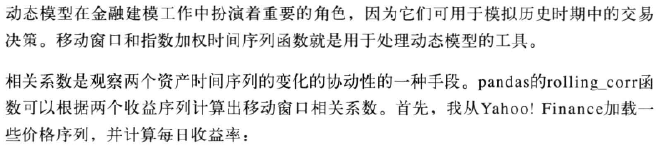

In [84]:
Image(filename="py35_picture\Rolling Correlation and Linear Regression.png")

In [64]:
aapl = web.get_data_yahoo('AAPL', '2000-01-01')['Adj Close']
msft = web.get_data_yahoo('MSFT', '2000-01-01')['Adj Close']

aapl_rets = aapl.pct_change()
msft_rets = msft.pct_change()

In [65]:
plt.figure()

D:\software\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=250).corr(other=<Series>)
  if __name__ == '__main__':


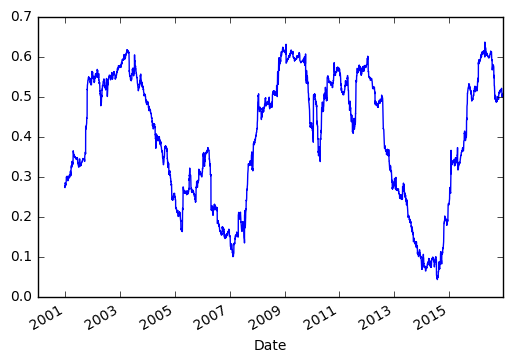

In [66]:
pd.rolling_corr(aapl_rets, msft_rets, 250).plot()

In [67]:
plt.figure()

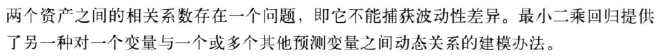

In [86]:
Image(filename="py35_picture\Rolling Correlation and Linear Regression 2.png")

In [83]:
model = pd.ols(y=aapl_rets, x={'MSFT': msft_rets}, window=250)
model.beta[:5]

D:\software\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  if __name__ == '__main__':


,MSFT,intercept
Date,,
2000-12-28,0.429020,-0.002113
2000-12-29,0.421102,-0.001796
2001-01-02,0.420595,-0.001839
2001-01-03,0.433291,-0.001289
2001-01-04,0.432771,-0.001307


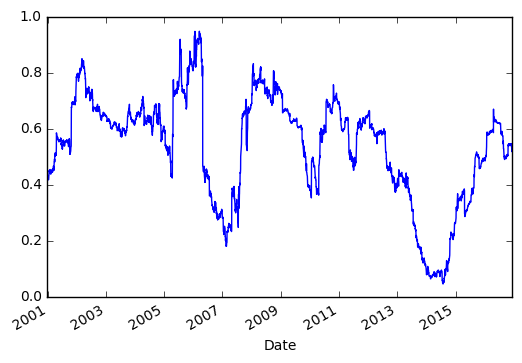

In [69]:
model.beta['MSFT'].plot()

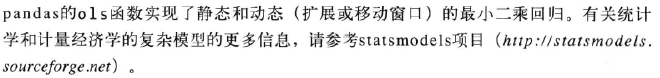

In [85]:
Image(filename="py35_picture\Rolling Correlation and Linear Regression 3.png")